In [1]:
import torch 
import os
import json
import deep_sdf.workspace as ws
import deep_sdf.utils
import scipy.io
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

split_filename = "./data/splits/wang_test.json"
checkpoint = "215"
experiment_directory = "test_experiment"

In [2]:
decoder = ws.load_trained_model(experiment_directory, checkpoint)
latent_variables = ws.load_latent_vectors(experiment_directory, checkpoint)
print(latent_variables.shape)

torch.Size([81221, 16])


In [3]:
mat = scipy.io.loadmat('./Wang2021/Geometries.mat')
geoms = mat["Geometries"]
mat = scipy.io.loadmat('./Wang2021/Properties.mat')
properties = mat["Properties"]
print(properties.shape)

(90245, 5)


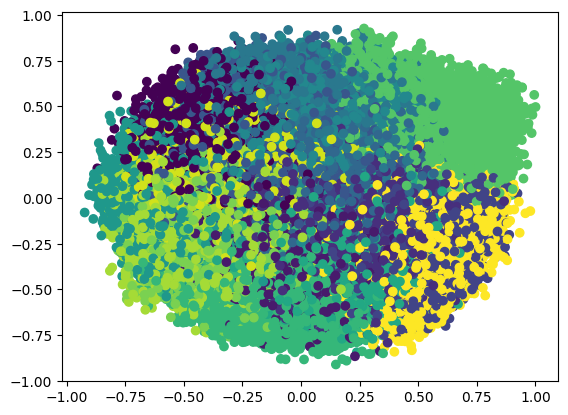

In [30]:
pca = PCA(n_components=2)  # Choose the number of components you want
latent_pca = pca.fit_transform(latent_variables)
n_clusters = 16
kmeans = KMeans(n_clusters = n_clusters, random_state = 0, n_init='auto')
kmeans.fit(latent_variables)
fig, ax = plt.subplots(1,1)
ax.scatter(x = latent_pca[:,0], y = latent_pca[:,1], c=kmeans.labels_)


In [31]:
# Create a dictionary to store examples for each cluster
cluster_samples = {}
for i, cluster_label in enumerate(kmeans.labels_):
    if cluster_label not in cluster_samples:
        cluster_samples[cluster_label] = []
    cluster_samples[cluster_label].append(i)

# Get random examples for each cluster
num_random_examples = 5  # Adjust as needed
random_samples = {}
for cluster_label, indices in cluster_samples.items():
    random_samples[cluster_label] = np.random.choice(indices, size=min(num_random_examples, len(indices)), replace=False)

# Display the random samples
for cluster_label, samples in random_samples.items():
    print(f"Cluster {cluster_label} Random Samples: {samples}")

Cluster 7 Random Samples: [45659 63607 60064 66761 32522]
Cluster 4 Random Samples: [38404 33911 56114 54611 19053]
Cluster 9 Random Samples: [26307 46813 19076 57502 53527]
Cluster 13 Random Samples: [50234   992 47278 16547  8689]
Cluster 8 Random Samples: [41647 35726 15815 69537 24846]
Cluster 0 Random Samples: [13983 30078 47658 17630 74518]
Cluster 3 Random Samples: [22846 37983 30150 17707 41702]
Cluster 12 Random Samples: [26955  6377 69564 34076 69191]
Cluster 10 Random Samples: [24560 43555 53499  6408 15428]
Cluster 6 Random Samples: [24062 62057 43055 78714 13563]
Cluster 5 Random Samples: [51496 63082 49855 71047 11626]
Cluster 15 Random Samples: [47612 55791 69030  6001 13423]
Cluster 14 Random Samples: [36563 64755 22808 71417 18974]
Cluster 11 Random Samples: [61405 43002 16826 42117 33505]
Cluster 2 Random Samples: [66649  6000 26531 31443 68294]
Cluster 1 Random Samples: [12878 21078 45222 34897 55445]


In [32]:
print(random_samples)

{7: array([45659, 63607, 60064, 66761, 32522]), 4: array([38404, 33911, 56114, 54611, 19053]), 9: array([26307, 46813, 19076, 57502, 53527]), 13: array([50234,   992, 47278, 16547,  8689]), 8: array([41647, 35726, 15815, 69537, 24846]), 0: array([13983, 30078, 47658, 17630, 74518]), 3: array([22846, 37983, 30150, 17707, 41702]), 12: array([26955,  6377, 69564, 34076, 69191]), 10: array([24560, 43555, 53499,  6408, 15428]), 6: array([24062, 62057, 43055, 78714, 13563]), 5: array([51496, 63082, 49855, 71047, 11626]), 15: array([47612, 55791, 69030,  6001, 13423]), 14: array([36563, 64755, 22808, 71417, 18974]), 11: array([61405, 43002, 16826, 42117, 33505]), 2: array([66649,  6000, 26531, 31443, 68294]), 1: array([12878, 21078, 45222, 34897, 55445])}


/tmp/ipykernel_16897/2536451346.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[i,j].scatter(x, y, c=z,cmap = cm.get_cmap("tab20"), vmin=-n_clusters)


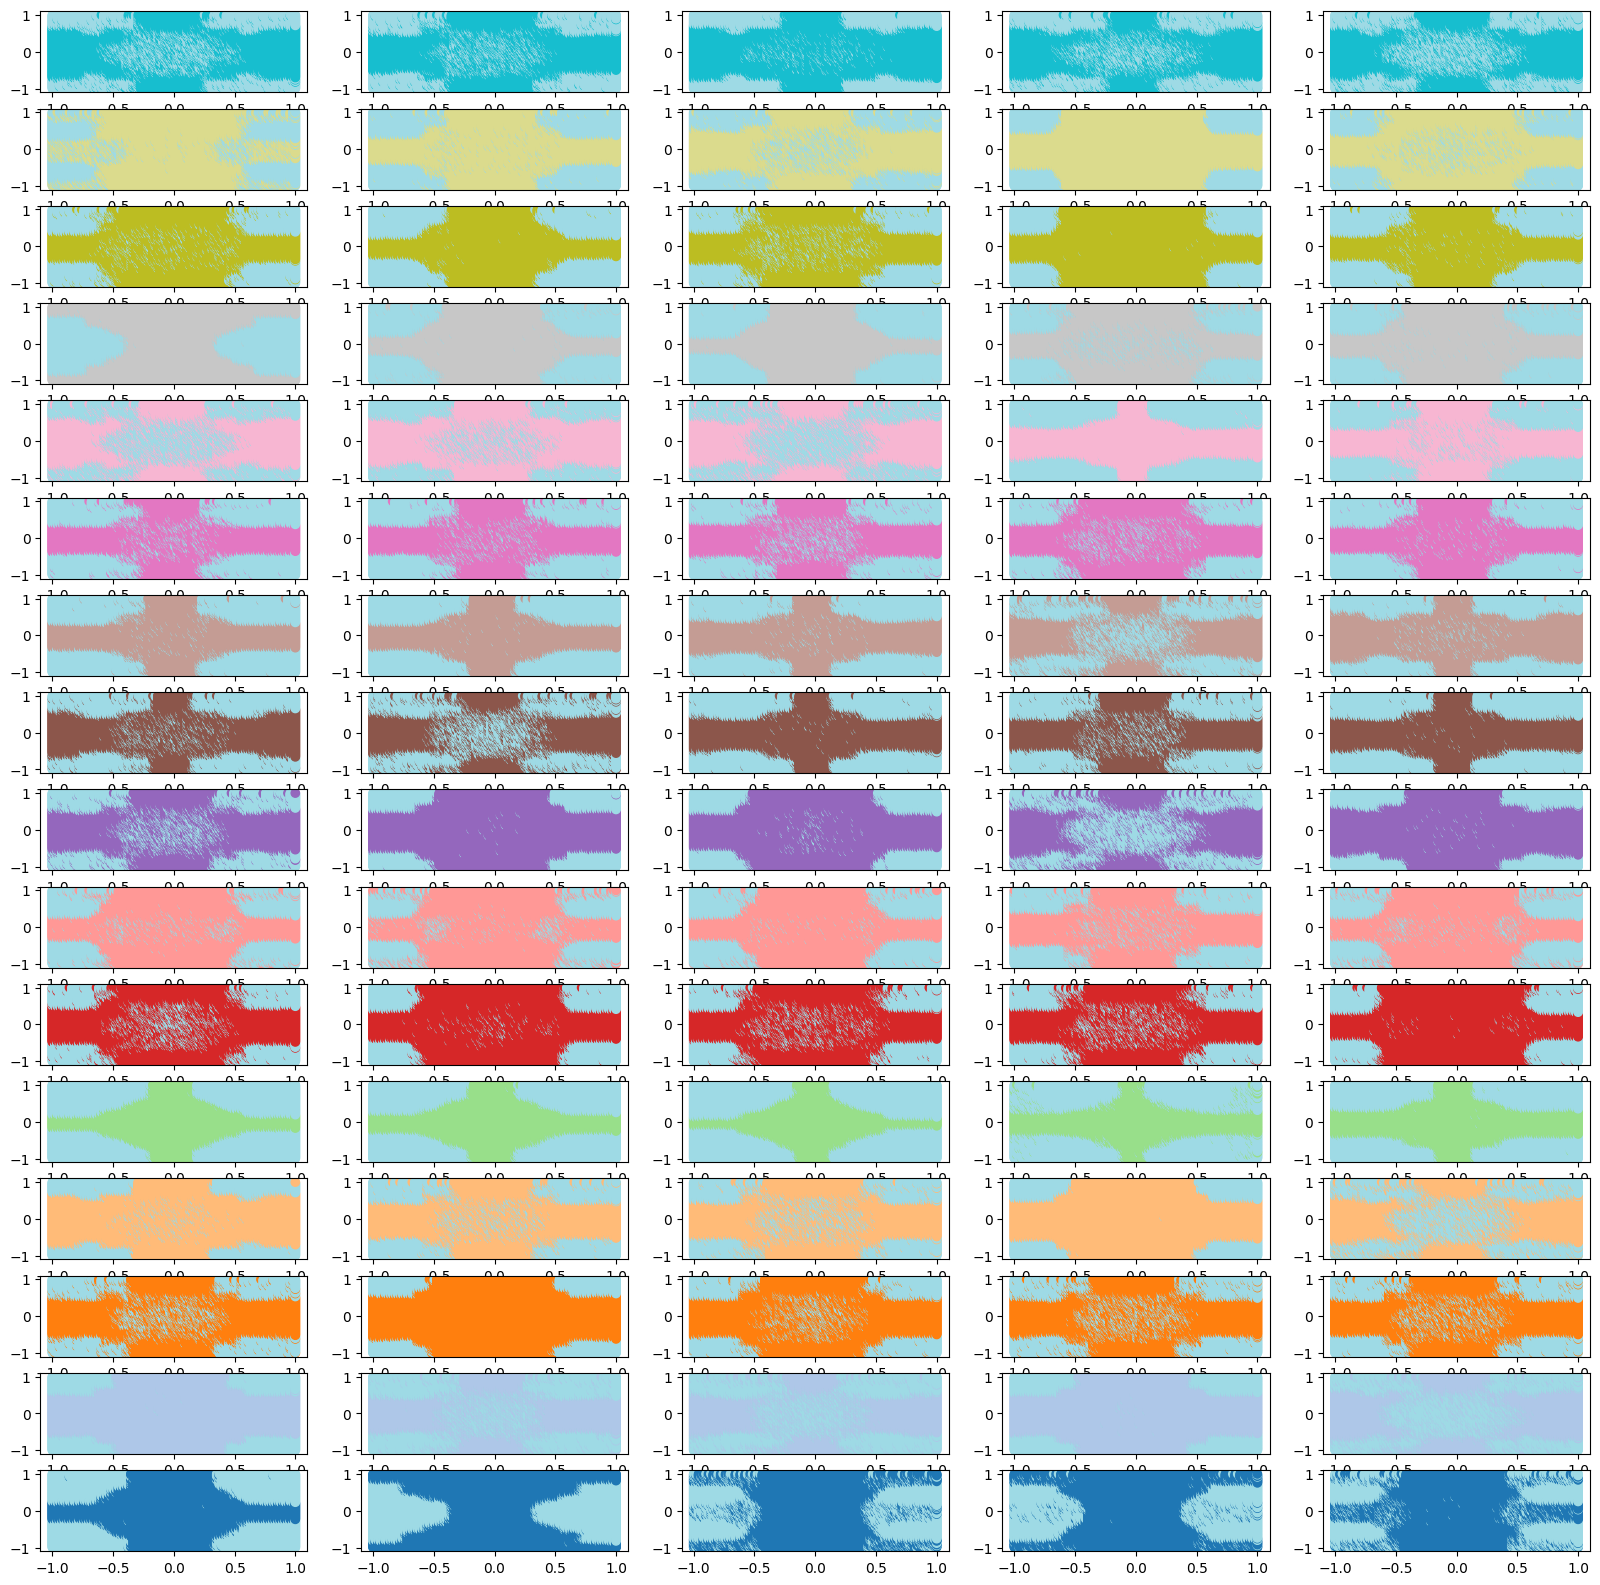

In [34]:
ms_per_k_mean = 5
random_samples = {}
for cluster_label, indices in cluster_samples.items():
    random_samples[cluster_label] = np.random.choice(indices, size=min(ms_per_k_mean, len(indices)), replace=False)

fig, ax = plt.subplots(n_clusters, ms_per_k_mean, figsize=(20,20))

for i, ai in enumerate(ax):
    for j, aj in enumerate(ai):
        index = random_samples[i][j]
        latent_vector = pca.inverse_transform(latent_pca[index])
        x, y, z = deep_sdf.utils.get_MS(decoder, latent_vector)
        
        z[np.where(z<=0)] = -i-1
        z[np.where(z>0)] = 0
        ax[i,j].scatter(x, y, c=z,cmap = cm.get_cmap("tab20"), vmin=-n_clusters)
            